# 03 — Exploratory Data Analysis (EDA)

- E-commerce Customer Segmentation & Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
# Plot Styling

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["figure.dpi"] = 100

In [7]:
# LAODING RAW DATA

df_raw = pd.read_csv(
    "../data/raw/online_retail.csv",
    encoding="ISO-8859-1",
    dtype={"CustomerID": str}
)

print(f"Raw Data Shape: {df_raw.shape}")

Raw Data Shape: (541909, 8)


In [8]:
# LOADING CLEANED DATA

df = pd.read_csv(
    "../data/cleaned_data.csv",
    dtype={"CustomerID": str}
)

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="mixed")

print(f"Cleaned Data Shape: {df.shape}")

Cleaned Data Shape: (524878, 9)


In [10]:
#  Cancellation Analysis (RAW DATA)

cancelled = df_raw[df_raw["InvoiceNo"].str.startswith("C", na=False)]
total = len(df_raw)
cancel_rate = round((len(cancelled) / total * 100), 2)

print(f"Total Transactions   : {total:,}")
print(f"Cancelled Orders     : {len(cancelled):,}")
print(f"Cancellation Rate    : {cancel_rate}%")

Total Transactions   : 541,909
Cancelled Orders     : 9,288
Cancellation Rate    : 1.71%


###  Top 10 Countries by Cancellation ( RAW DATA)

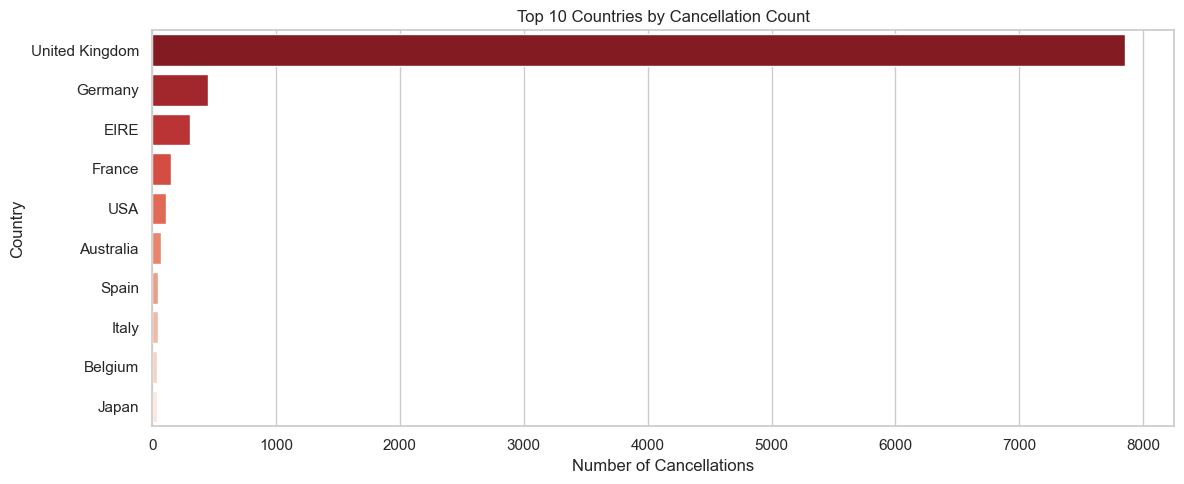

In [12]:

cancel_by_country = cancelled["Country"].value_counts().head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=cancel_by_country.values, y=cancel_by_country.index, palette="Reds_r")
plt.title("Top 10 Countries by Cancellation Count")
plt.xlabel("Number of Cancellations")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### Monthly Cancellation Trend (RAW DATA)

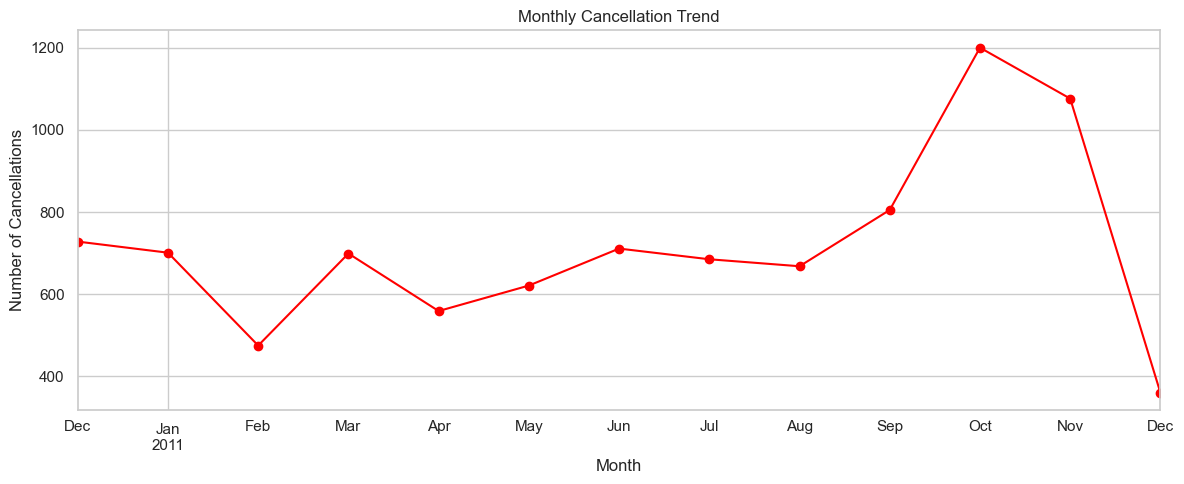

In [14]:
df_raw["InvoiceDate"] = pd.to_datetime(df_raw["InvoiceDate"], format="mixed")

cancelled = df_raw[df_raw["InvoiceNo"].str.startswith("C", na=False)]

cancelled_trend = cancelled.copy()
cancelled_trend["Month"] = cancelled_trend["InvoiceDate"].dt.to_period("M")
monthly_cancel = cancelled_trend.groupby("Month").size()

plt.figure(figsize=(12, 5))
monthly_cancel.plot(kind="line", marker="o", color="red")
plt.title("Monthly Cancellation Trend")
plt.xlabel("Month")
plt.ylabel("Number of Cancellations")
plt.tight_layout()
plt.show()

### Sales Trend Over Time (Cleaned Data)

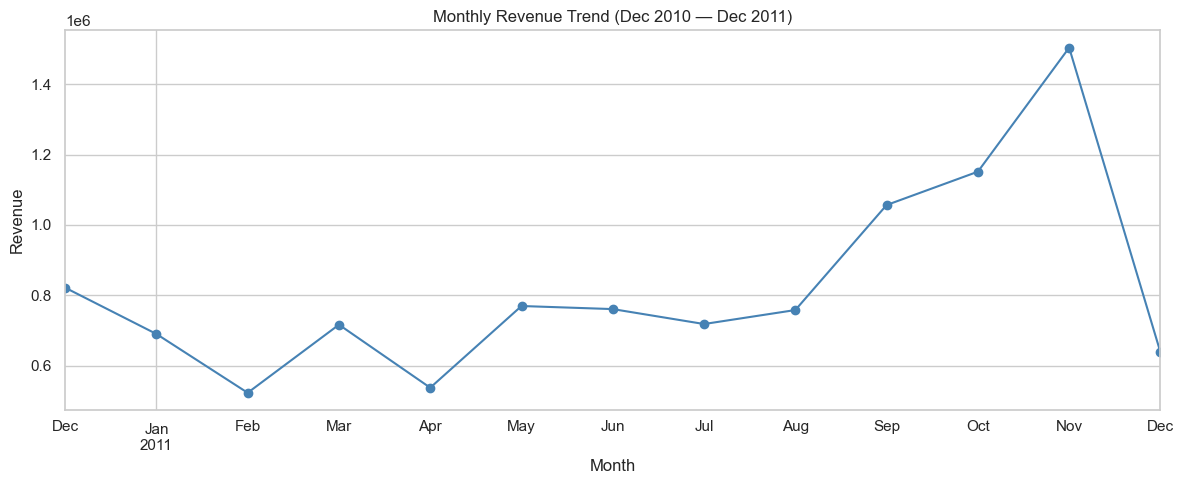

In [26]:
df["Month"] = df["InvoiceDate"].dt.to_period("M")
monthly_revenue = df.groupby("Month")["TotalPrice"].sum()

plt.figure(figsize=(12, 5))
monthly_revenue.plot(kind="line", marker="o", color="steelblue")
plt.title("Monthly Revenue Trend (Dec 2010 — Dec 2011)")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

### Monthly Order Count Trend

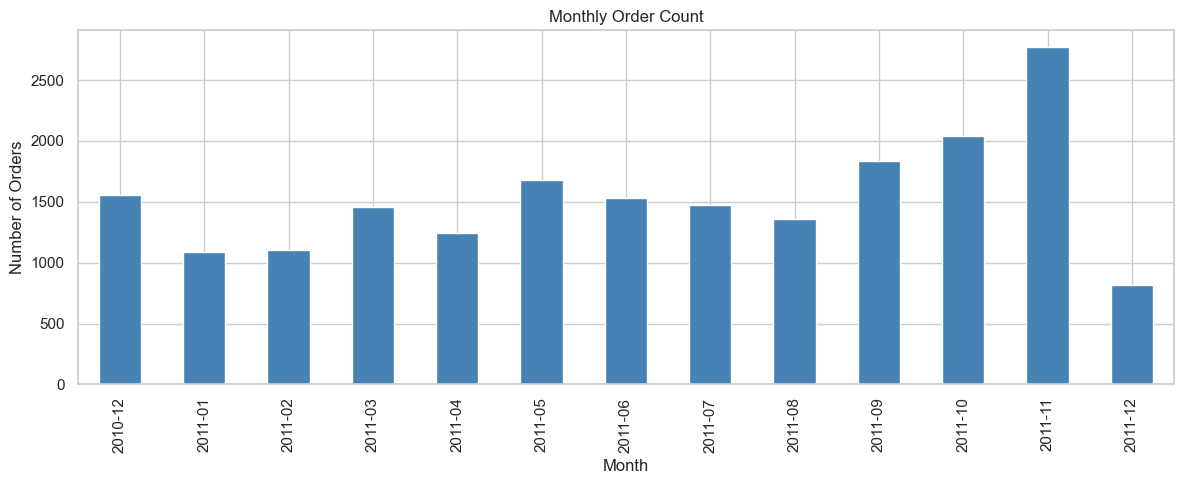

In [16]:
monthly_orders = df.groupby("Month")["InvoiceNo"].nunique()

plt.figure(figsize=(12, 5))
monthly_orders.plot(kind="bar", color="steelblue")
plt.title("Monthly Order Count")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

### Top 10 countries by Revenue

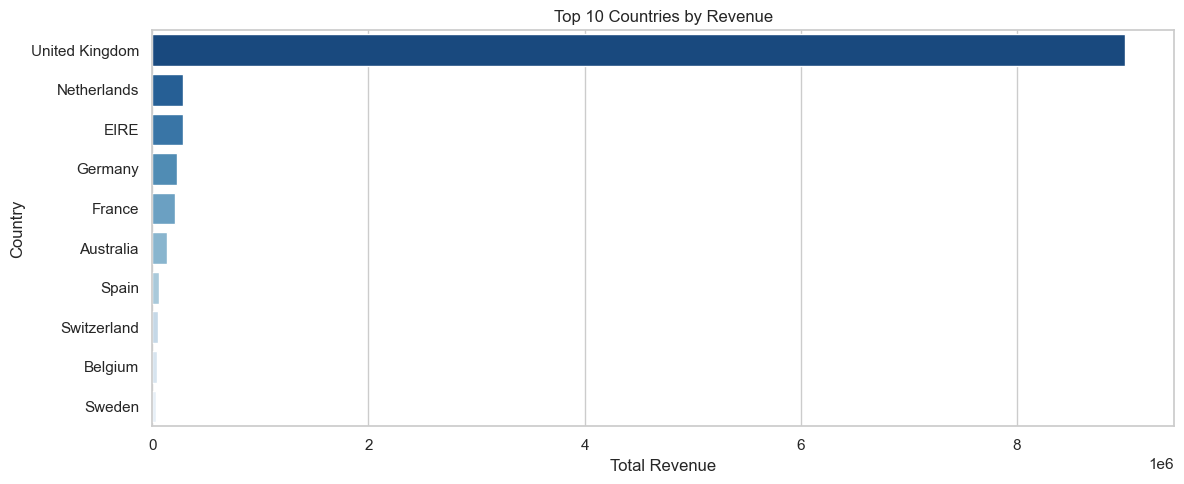

In [27]:
country_revenue = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="Blues_r")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### Top 10 best selling products

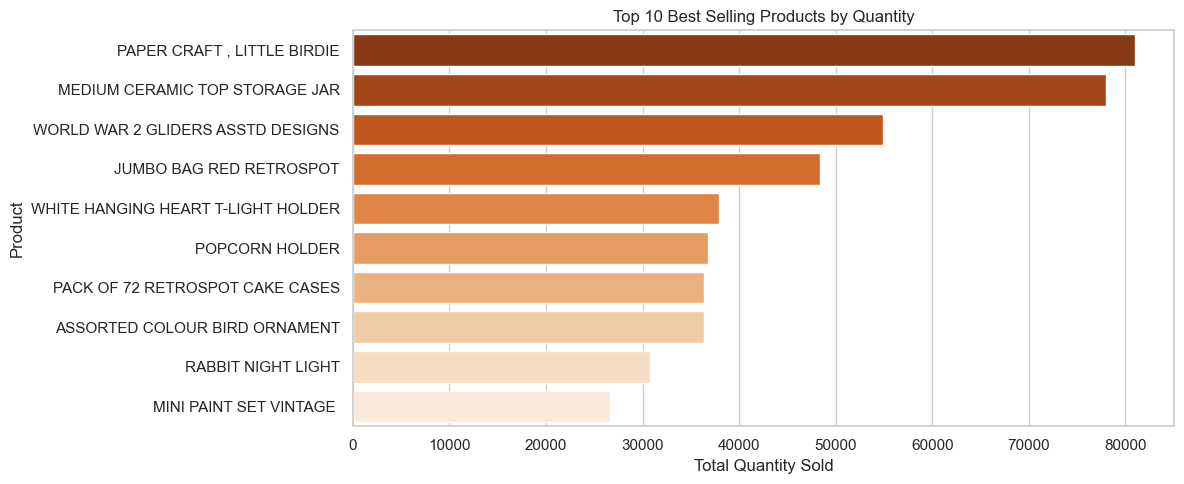

In [18]:
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="Oranges_r")
plt.title("Top 10 Best Selling Products by Quantity")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

### Top 10 products by Revenue

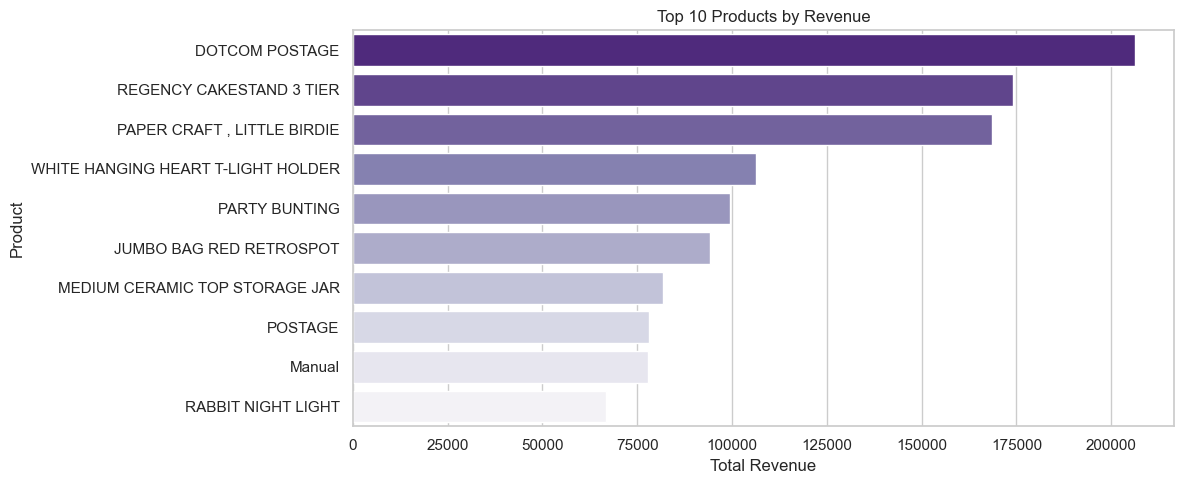

In [28]:
top_revenue_products = df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index, palette="Purples_r")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

### Revenue Distribution by Day of Week

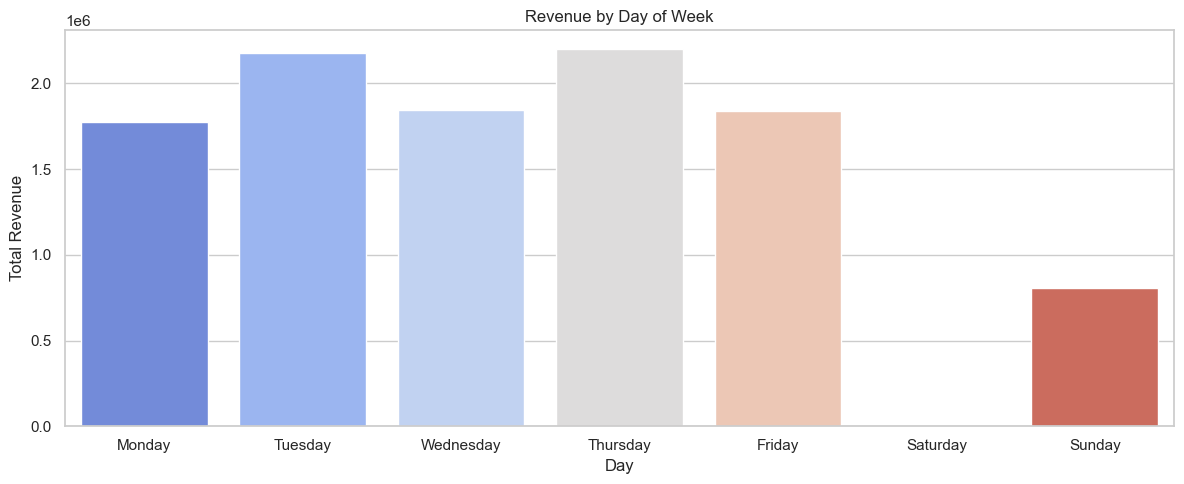

In [29]:
df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_revenue = df.groupby("DayOfWeek")["TotalPrice"].sum().reindex(day_order)

plt.figure(figsize=(12, 5))
sns.barplot(x=day_revenue.index, y=day_revenue.values, palette="coolwarm")
plt.title("Revenue by Day of Week")
plt.xlabel("Day")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

###  Revenue by Hour of Day

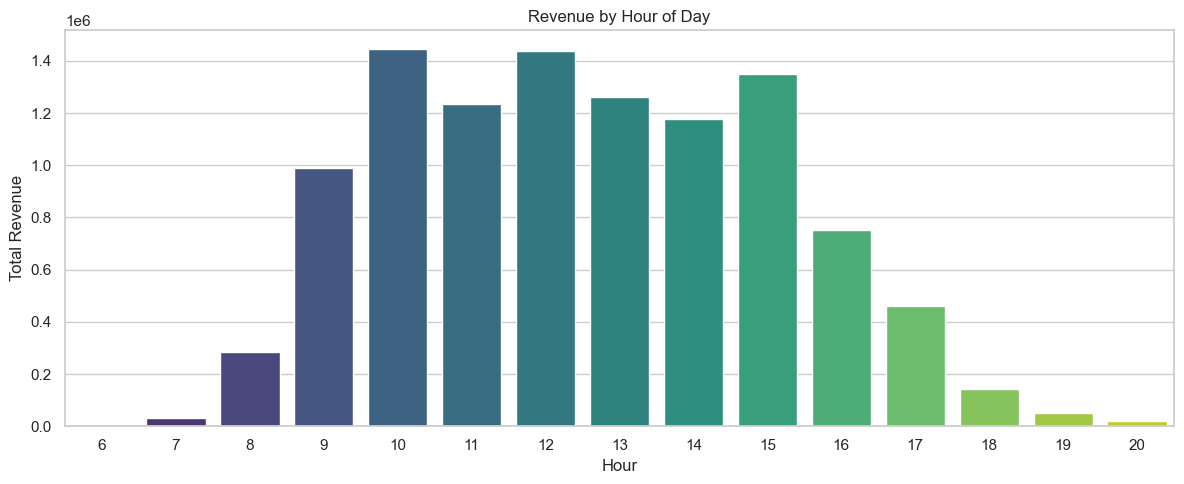

In [30]:
df["Hour"] = df["InvoiceDate"].dt.hour
hour_revenue = df.groupby("Hour")["TotalPrice"].sum()

plt.figure(figsize=(12, 5))
sns.barplot(x=hour_revenue.index, y=hour_revenue.values, palette="viridis")
plt.title("Revenue by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

### Customer Purchase Frequency Distribution

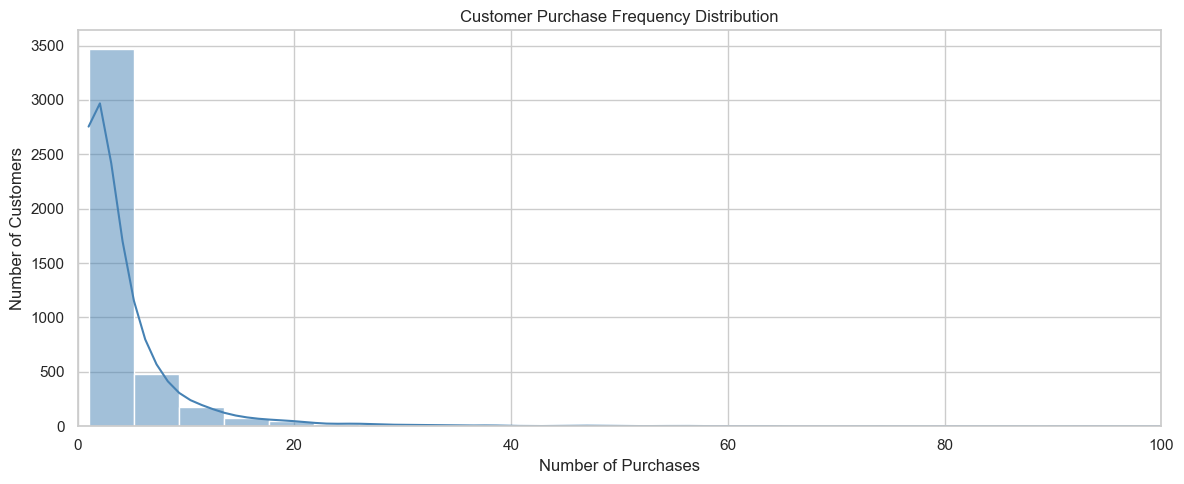

Average Purchases per Customer : 4.27
Median Purchases per Customer  : 2.0
Max Purchases by One Customer  : 209


In [23]:
customer_freq = df.dropna(subset=["CustomerID"]).groupby("CustomerID")["InvoiceNo"].nunique()

plt.figure(figsize=(12, 5))
sns.histplot(customer_freq, bins=50, kde=True, color="steelblue")
plt.title("Customer Purchase Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

print(f"Average Purchases per Customer : {customer_freq.mean().round(2)}")
print(f"Median Purchases per Customer  : {customer_freq.median()}")
print(f"Max Purchases by One Customer  : {customer_freq.max()}")

### Customer Monetary Distribution

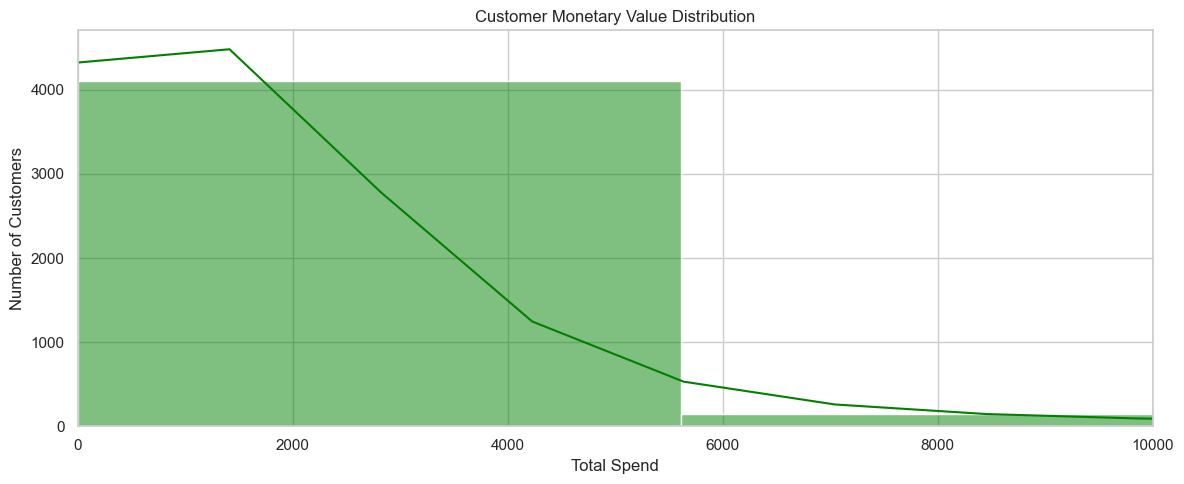

Average Spend per Customer : 2048.69
Median Spend per Customer  : 668.57
Max Spend by One Customer  : 280206.02


In [32]:
customer_monetary = df.dropna(subset=["CustomerID"]).groupby("CustomerID")["TotalPrice"].sum()

plt.figure(figsize=(12, 5))
sns.histplot(customer_monetary, bins=50, kde=True, color="green")
plt.title("Customer Monetary Value Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Number of Customers")
plt.xlim(0, 10000)
plt.tight_layout()
plt.show()

print(f"Average Spend per Customer : {customer_monetary.mean().round(2)}")
print(f"Median Spend per Customer  : {customer_monetary.median().round(2)}")
print(f"Max Spend by One Customer  : {customer_monetary.max().round(2)}")

### One Time vs Repeat Customers

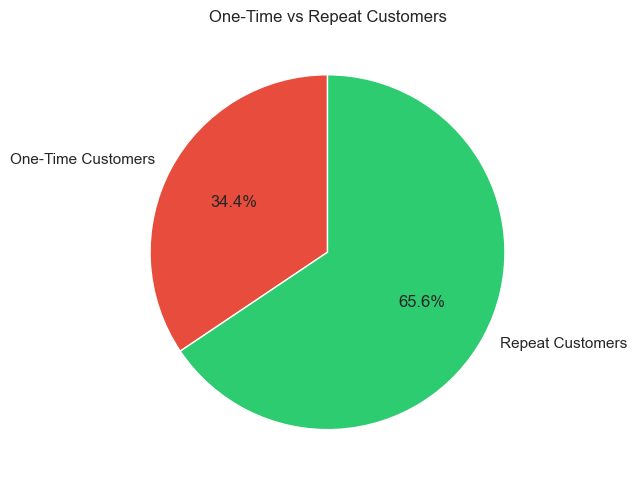

One-Time Customers : 1,493
Repeat Customers   : 2,845


In [33]:
customer_orders = df.dropna(subset=["CustomerID"]).groupby("CustomerID")["InvoiceNo"].nunique()

one_time = (customer_orders == 1).sum()
repeat = (customer_orders > 1).sum()

plt.figure(figsize=(8, 5))
plt.pie(
    [one_time, repeat],
    labels=["One-Time Customers", "Repeat Customers"],
    autopct="%1.1f%%",
    colors=["#E74C3C", "#2ECC71"],
    startangle=90
)
plt.title("One-Time vs Repeat Customers")
plt.tight_layout()
plt.show()

print(f"One-Time Customers : {one_time:,}")
print(f"Repeat Customers   : {repeat:,}")

### Single Item vs Multi Item Orders

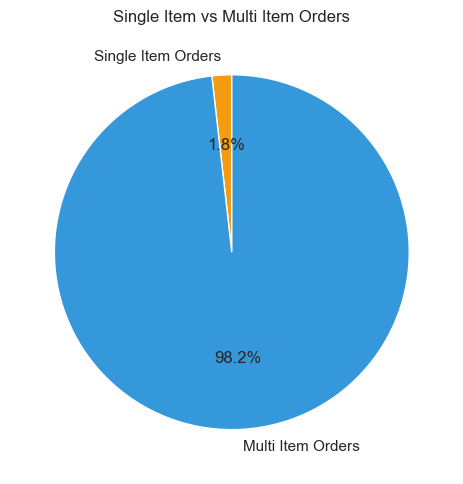

Single Item Orders : 358
Multi Item Orders  : 19,604


In [36]:
items_per_order = df.groupby("InvoiceNo")["Quantity"].sum()

single_item = (items_per_order == 1).sum()
multi_item = (items_per_order > 1).sum()

plt.figure(figsize=(8, 5))
plt.pie(
    [single_item, multi_item],
    labels=["Single Item Orders", "Multi Item Orders"],
    autopct="%1.1f%%",
    colors=["#F39C12", "#3498DB"],
    startangle=90
)
plt.title("Single Item vs Multi Item Orders")
plt.tight_layout()
plt.show()

print(f"Single Item Orders : {single_item:,}")
print(f"Multi Item Orders  : {multi_item:,}")

### Correlation Heatmap

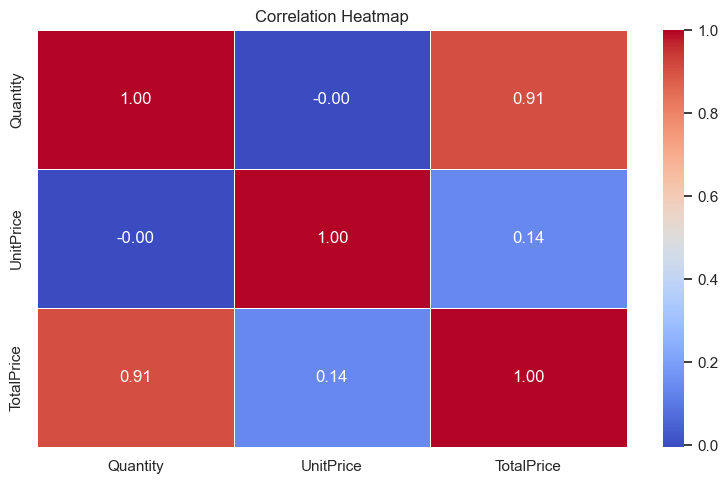

In [25]:
corr_df = df[["Quantity", "UnitPrice", "TotalPrice"]].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### EDA Summary

In [39]:

print("EDA SUMMARY")

print(f"Total Revenue                : {df['TotalPrice'].sum():,.2f}")
print(f"Average Order Value          : {df.groupby('InvoiceNo')['TotalPrice'].sum().mean():,.2f}")
print(f"Top Country by Revenue       : {df.groupby('Country')['TotalPrice'].sum().idxmax()}")
print(f"Top Product by Quantity      : {df.groupby('Description')['Quantity'].sum().idxmax()}")
print(f"Best Revenue Month           : {df.groupby('Month')['TotalPrice'].sum().idxmax()}")
print(f"Best Revenue Day             : {df.groupby('DayOfWeek')['TotalPrice'].sum().idxmax()}")
print(f"Peak Hour                    : {df.groupby('Hour')['TotalPrice'].sum().idxmax()}:00")
print(f"One-Time Customers           : {one_time:,}")
print(f"Repeat Customers             : {repeat:,}")
print(f"Average Items per Order      : {items_per_order.mean().round(2)}")


print("EDA complete — proceed to 04_rfm_engineering.ipynb")

EDA SUMMARY
Total Revenue                : 10,642,110.80
Average Order Value          : 533.12
Top Country by Revenue       : United Kingdom
Top Product by Quantity      : PAPER CRAFT , LITTLE BIRDIE
Best Revenue Month           : 2011-11
Best Revenue Day             : Thursday
Peak Hour                    : 10:00
One-Time Customers           : 1,493
Repeat Customers             : 2,845
Average Items per Order      : 279.15
EDA complete — proceed to 04_rfm_engineering.ipynb
